In [3]:
#Importing libraries

import matplotlib.pyplot as plt
import numpy as np
from numpy import *
import pandas as pd
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from uncertainties import *

In [4]:
#Reading data

ceph = pd.read_csv('data/ceph.csv')
c0283 = pd.read_csv('data/cep-0283.csv')
c0374 = pd.read_csv('data/cep-0374.csv')
c0387 = pd.read_csv('data/cep-0387.csv')
c0793 = pd.read_csv('data/cep-0793.csv')
cep = pd.read_csv('data/cep.csv')
kraft = pd.read_csv('data/kraft.csv')

In [5]:
#Calculations

ceph['logP'] = np.log10(ceph['P'])
cep['logP'] = np.log10(cep['P'])
ceph['uns'] = 0.1
kraft['uns'] = 0.1

def fit (x, a, b):
    fit_y = a*x + b
    return fit_y

constants_ceph, cov_ceph = curve_fit(fit, ceph['logP'], ceph['m'])
a_fit_ceph = constants_ceph[0]
b_fit_ceph = constants_ceph[1]
print(constants_ceph[0])
print(sqrt(cov_ceph[0][0]))
print(constants_ceph[1])
print(sqrt(cov_ceph[1][1]))

fit_y_ceph = []
for i in ceph['logP']:
    fit_y_ceph.append(fit(i,a_fit_ceph,b_fit_ceph))
    
constants_kraft, cov_kraft = curve_fit(fit, kraft['logP'], kraft['M'])
a_fit_kraft = constants_kraft[0]
b_fit_kraft = constants_kraft[1]
print(constants_kraft[0])
print(sqrt(cov_kraft[0][0]))
print(constants_kraft[1])
print(sqrt(cov_kraft[1][1]))

fit_y_kraft = []
for i in kraft['logP']:
    fit_y_kraft.append(fit(i,a_fit_kraft,b_fit_kraft))    
    
a_1 = ufloat(constants_ceph[0], sqrt(cov_ceph[0][0]))
b_1 = ufloat(constants_ceph[1], sqrt(cov_ceph[1][1]))

a_2 = ufloat(constants_kraft[0], sqrt(cov_kraft[0][0]))
b_2 = ufloat(constants_kraft[1], sqrt(cov_kraft[1][1]))

dy = (a_1 - a_2) * 1 + (b_1 - b_2)
print(dy)

d = 10 ** ((dy + 5)/5)
print(d)

-2.8556452640434165
0.028582697845003547
18.048922337509577
0.014603579875910983
-3.516049285756721
0.14757259942643536
-0.6008099583230315
0.13398096784287652
19.31+/-0.20
(7.3+/-0.7)e+04


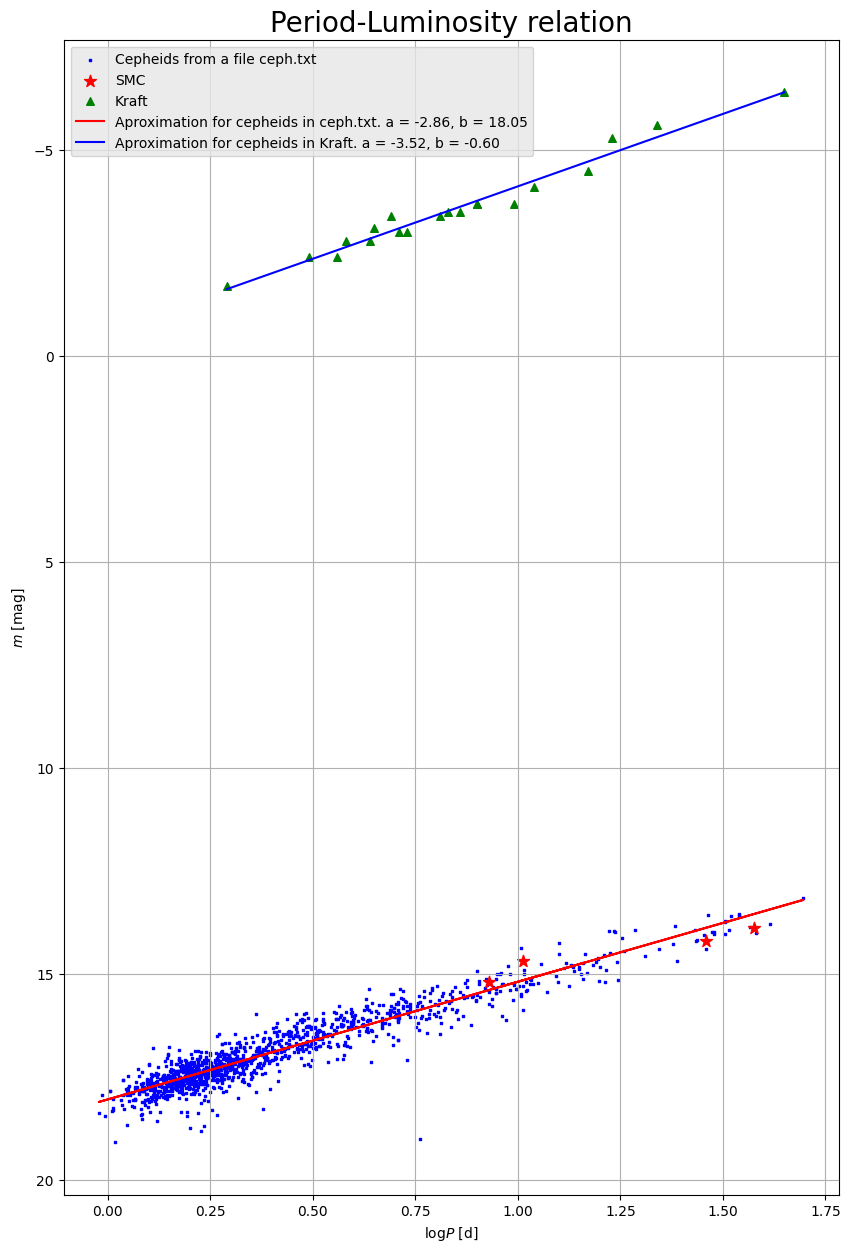

In [6]:
#Plotting

fig, ax = plt.subplots(figsize=(10,15))

ax.grid()
ax.set_title('Period-Luminosity relation')

ax.title.set_fontsize(20)
ax.set_xlabel('log$P$ [d]')
ax.xaxis.label.set_fontsize(10)
ax.set_ylabel('$m$ [mag]')
ax.yaxis.label.set_fontsize(10)
ax.invert_yaxis()

ax.scatter(ceph['logP'], ceph['m'],
           s=3, c='blue', marker="s", label='Сepheids from a file ceph.txt')
ax.scatter(cep['logP'], cep['m'],
           s=80, c='red', marker="*", label='SMC')
ax.scatter(kraft['logP'], kraft['M'],
           s=30, c='green', marker="^", label='Kraft')
ax.plot(ceph['logP'], fit_y_ceph, c='red', label='Aproximation for cepheids in ceph.txt. a = -2.86, b = 18.05')
ax.plot(kraft['logP'], fit_y_kraft, c='blue', label='Aproximation for cepheids in Kraft. a = -3.52, b = -0.60')

legend = ax.legend(scatterpoints=1,markerscale = 1)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show() 
fig.savefig('plots/Period-Luminosity relation.png', bbox_inches='tight')